In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
dataset = pd.read_pickle('headline_ex3.pkl')

In [4]:
US_dataset = dataset[dataset['countrycode'] == 'US' ]

In [5]:
World_dataset = dataset[dataset['countrycode'] != 'US']

In [6]:
US_dataset

,headline,city,latitude,longitude,countrycode,K-Mean_label,DBSCAN_label
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US,1,0
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US,1,0
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US,1,0
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US,1,0
6,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US,1,0
...,...,...,...,...,...,...,...
637,Dengue Outbreak in Easton,Easton,38.77428,-76.07633,US,1,0
640,Authorities are Worried about the Spread of Va...,Clovis,36.82523,-119.70292,US,1,0
641,More Zika patients reported in Fort Worth,Fort Worth,32.72541,-97.32085,US,1,0
642,Zika symptoms spotted in Boynton Beach,Boynton Beach,26.52535,-80.06643,US,1,0


In [7]:
US_dataset = US_dataset.drop(columns=['K-Mean_label', 'DBSCAN_label'])
World_dataset = World_dataset.drop(columns=['K-Mean_label', 'DBSCAN_label'])

In [8]:
def elbow_method(data):
    k_value = range(1,10) 
    inertia_val = [KMeans(k).fit(data[['latitude','longitude']]).inertia_ for k in k_value]
    plt.plot(k_value, inertia_val )
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()    
    

In [9]:
from math import cos, sin, asin

def great_circle_distance(x1, y1, x2, y2):
    delta_x, delta_y = x2 - x1, y2 - y2
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(x1), cos(x2),
                                                   sin(delta_y / 2) ** 2])
    return 2 * asin(haversin ** 0.5)

In [17]:
def clustering_and_visualize(data,n):
    k_mean_position_cluster = KMeans(n_clusters = n).fit(data[['latitude','longitude']])
    centroids = k_mean_position_cluster.cluster_centers_
    print(centroids)
    #print(centroids)
    #plt.scatter(data_set['latitude'],data_set['longitude'],c = k_mean_position_cluster.labels_.astype(float),s = 50 , alpha = 0.5)
    #plt.scatter(centroids[:,0],centroids[:,1],c = 'red', s = 50)
    #plt.show()
    #a = range(len(centroid))
    centroid_list = [[i,j[0],j[1]] for i,j in enumerate(centroids)]
    
    Centroid_df = pd.DataFrame(centroid_list,columns=["Cluster", "Cluster_Latitude","Cluster_Longtitude"])
    
    
    data['Cluster'] = k_mean_position_cluster.labels_
    
    data = data.merge(Centroid_df,how='left',on="Cluster")
    data['Centroid_Length'] = np.vectorize(great_circle_distance)(data['longitude'], data['latitude'], data['Cluster_Longtitude'], data['Cluster_Latitude'])
    fig = plt.figure(figsize=(12, 8))
    map_plotter = Basemap()
    map_plotter.scatter(data['longitude'],data['latitude'], latlon=True,c=k_mean_position_cluster.labels_.astype(float))
    map_plotter.scatter(centroids[:,1],centroids[:,0],c = 'red', s = 60)
    plt.text(centroids[:,1],centroids[:,0], [['Swine Flu','Bronchitis','Zika']], fontsize=18)
    map_plotter.shadedrelief()
    
    plt.show()
    
    return data

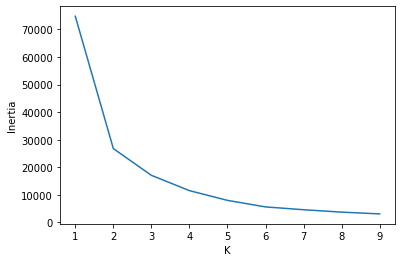

In [11]:
elbow_method(US_dataset)

In [18]:
US_data_cluster = clustering_and_visualize(US_dataset,3)

[[  34.96685534  -78.75703183]
 [  36.50629771 -118.91299083]
 [  37.04725466  -93.25711045]]


TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 864x576 with 1 Axes>

In [ ]:
US_data_cluster

In [ ]:
US_group = US_data_cluster.groupby(['Cluster'])

In [ ]:
US_group.first()

In [ ]:
US_Cluster_Sorted =US_data_cluster.groupby('Cluster').apply(pd.DataFrame.sort_values, 'Centroid_Length',ascending=False)

In [ ]:
US_Cluster_Sorted_top = US_data_cluster.sort_values('Centroid_Length',ascending=False).groupby('Cluster').first()

In [ ]:
US_Cluster_Sorted_top